In [1]:
from fastai.vision.all import *

In [2]:
def is_cat(x): return x[0].isupper()

In [3]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

In [4]:
learn = vision_learner(dls, resnet18, metrics=error_rate).to_fp16()
learn.fine_tune(3)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.202122,0.062211,0.021651,00:52


epoch,train_loss,valid_loss,error_rate,time
0,0.066893,0.051946,0.015562,00:44
1,0.045820,0.035449,0.009472,00:44
2,0.022153,0.026501,0.007442,00:44


In [6]:
!wget https://raw.githubusercontent.com/EN10/PyTorch-ImageClassification/main/dog.jpg

--2022-09-06 08:44:02--  https://raw.githubusercontent.com/EN10/PyTorch-ImageClassification/main/dog.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78949 (77K) [image/jpeg]
Saving to: ‘dog.jpg’

dog.jpg             100%[===================>]  77.10K  --.-KB/s    in 0.01s   

2022-09-06 08:44:02 (6.16 MB/s) - ‘dog.jpg’ saved [78949/78949]



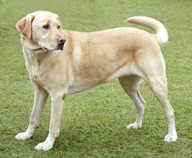

In [7]:
im = PILImage.create('dog.jpg')
im.thumbnail((192,192))
im

In [8]:
learn.predict(im)

('False', TensorBase(0), TensorBase([9.9999e-01, 1.2656e-05]))

In [9]:
categories = ('Dog', 'Cat')

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [10]:
classify_image(im)

{'Dog': 0.9999873638153076, 'Cat': 1.2656288163270801e-05}